In [1]:
import geopandas as gpd

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
import pyogrio

In [4]:
import pycountry 

In [34]:
df = pd.read_csv('Cost_of_Living_Index_2022.csv')

In [35]:
df.columns = df.columns.str.replace(' ', '_')

In [36]:
df.head()

,Rank,Country,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [37]:
df.describe()

,Rank,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [38]:
df.isna().sum()

Rank                              0
Country                           0
Cost_of_Living_Index              0
Rent_Index                        0
Cost_of_Living_Plus_Rent_Index    0
Groceries_Index                   0
Restaurant_Price_Index            0
Local_Purchasing_Power_Index      0
dtype: int64

In [39]:
df.columns

Index(['Rank', 'Country', 'Cost_of_Living_Index', 'Rent_Index',
       'Cost_of_Living_Plus_Rent_Index', 'Groceries_Index',
       'Restaurant_Price_Index', 'Local_Purchasing_Power_Index'],
      dtype='object')

In [40]:
df['Country'].nunique()

139

In [41]:
# generate country code  based on country name 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.Country)
df.head()

,Rank,Country,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index,CODE
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04,AFG
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19,ALB
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63,DZA
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72,ARG
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86,ARM


In [42]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [43]:
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [44]:
merge=pd.merge(world,df,on='CODE')

In [45]:
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

In [46]:
merge.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry,Rank,Country,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",40,Fiji,43.16,17.76,31.26,48.06,37.42,35.87
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",24,Canada,70.22,34.33,53.40,70.01,67.86,87.98
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",132,United States,70.13,42.07,56.98,70.37,70.07,106.34
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",65,Kazakhstan,28.68,9.44,19.66,25.35,27.24,32.23
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",134,Uzbekistan,27.31,9.29,18.86,26.83,24.22,22.37


In [47]:
merge=merge.merge(location,on='name')

In [68]:
merge = merge.sort_values(['Cost_of_Living_Index'], ascending= False)

In [69]:
merge[['Country', 'Cost_of_Living_Index']].head(10)

,Country,Cost_of_Living_Index
71,Switzerland,123.35
85,Iceland,94.86
36,Israel,88.05
83,Denmark,84.12
11,Bahamas,84.00
72,Luxembourg,80.50
79,Australia,77.75
93,Japan,77.03
77,Ireland,76.05
74,Netherlands,75.66


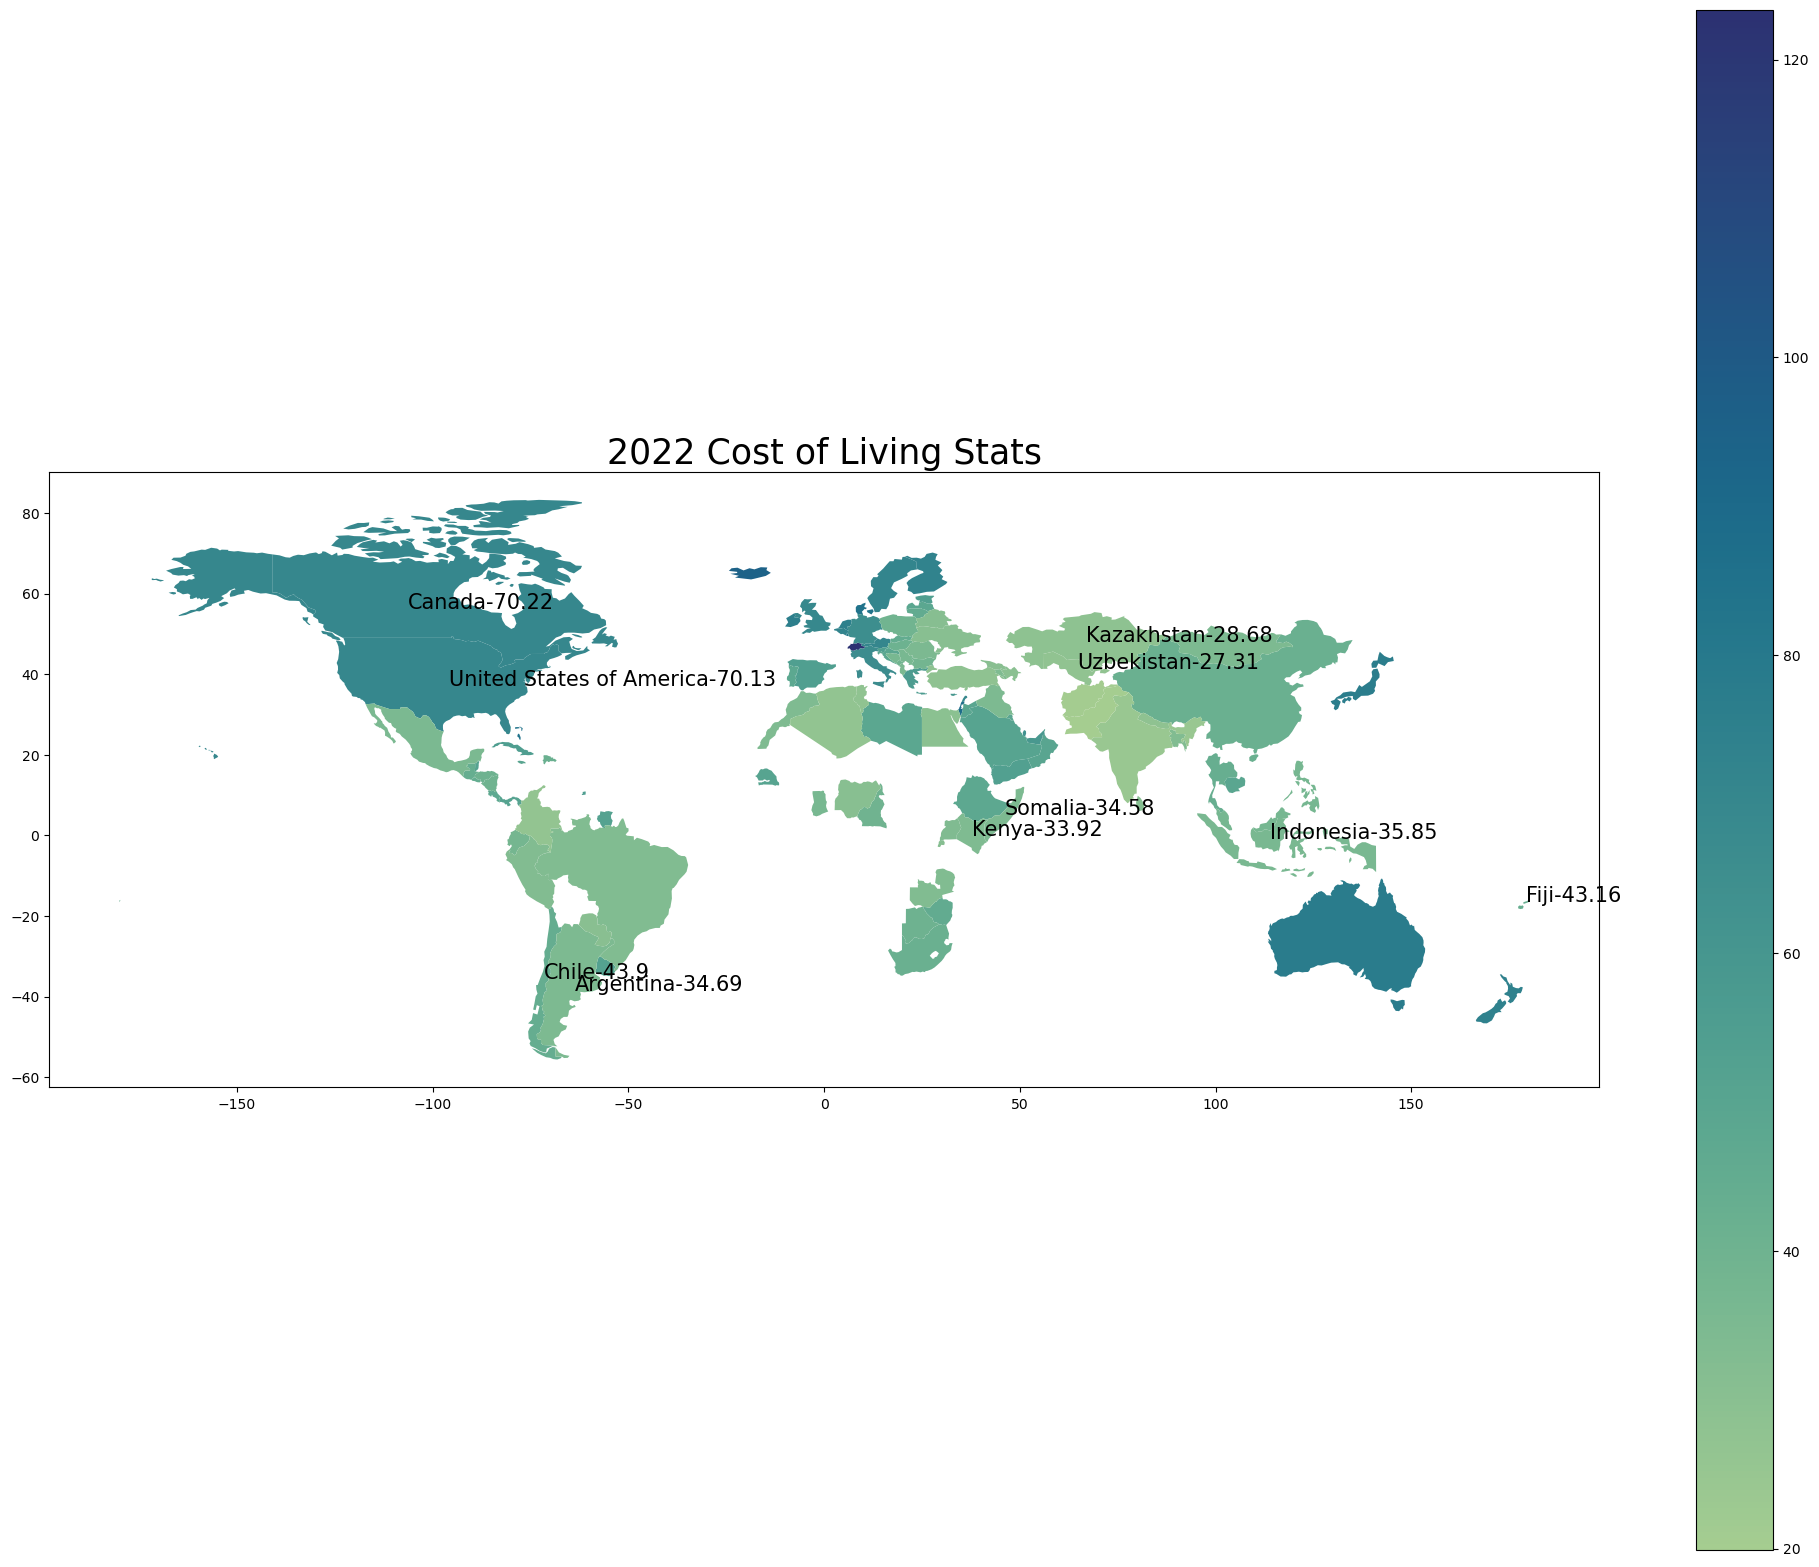

In [71]:
# plot confirmed cases world map 
merge.plot(column='Cost_of_Living_Index', 
           figsize=(25, 20),cmap='crest', legend = True )
plt.title('2022 Cost of Living Stats',fontsize=25)
# add countries names and numbers
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}-{}".format(merge.name[i],merge.Cost_of_Living_Index[i]),size=15)
plt.show()

In [57]:
merge['Country'].nunique()

108